Importion des librairies

In [2]:
# imports
import numpy as np
import pandas as pd
import plotly.express as px

Imporation des données depuis l'api de l'opendata EDF 


In [3]:
import requests

# URL de l'API
api_url = "https://opendata-reunion.edf.fr/api/explore/v2.1/catalog/datasets/consommation-annuelle-par-commune0/records"

# Envoyer une requête GET à l'API
response = requests.get(api_url)

# Vérifier si la requête a réussi (code de statut HTTP 200)
if response.status_code == 200:
    # Convertir les données JSON en un objet Python (dans ce cas, une liste ou un dictionnaire)
    data = response.json()

    # Afficher les données
    print(data)
else:
    # Afficher un message d'erreur si la requête a échoué
    print(f"Erreur de requête : {response.status_code}")


{'total_count': 936, 'results': [{'territoire': 'Reunion', 'commune': 'CILAOS', 'annee': 2012, 'code_insee': '97424', 'secteur': 'Non affecté', 'consommation_mwh': 10705.0, 'nombre_de_pds': None}, {'territoire': 'Reunion', 'commune': 'LA POSSESSION', 'annee': 2012, 'code_insee': '97408', 'secteur': 'Non affecté', 'consommation_mwh': 77779.0, 'nombre_de_pds': None}, {'territoire': 'Reunion', 'commune': 'SALAZIE', 'annee': 2012, 'code_insee': '97421', 'secteur': 'Non affecté', 'consommation_mwh': 12048.0, 'nombre_de_pds': None}, {'territoire': 'Reunion', 'commune': 'ST ANDRE', 'annee': 2012, 'code_insee': '97409', 'secteur': 'Non affecté', 'consommation_mwh': 134537.0, 'nombre_de_pds': None}, {'territoire': 'Reunion', 'commune': 'ST LEU', 'annee': 2012, 'code_insee': '97413', 'secteur': 'Non affecté', 'consommation_mwh': 67006.0, 'nombre_de_pds': None}, {'territoire': 'Reunion', 'commune': 'STE SUZANNE', 'annee': 2012, 'code_insee': '97420', 'secteur': 'Non affecté', 'consommation_mwh': 

In [4]:
import requests
import pandas as pd


# @st.cache_data
def fetch_data_from_api(url: str, offset: int, limit: int) -> dict:
    params = {'limit': limit, 'offset': offset}
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        raise Exception(f"Failed API request: Status {response.status_code}")
    

# @st.cache_data
def fetch_all_data(url: str) -> pd.DataFrame:
    all_data = []
    limit = 100
    offset = 0
    total_records = None

    while total_records is None or offset < total_records:
        data = fetch_data_from_api(url, offset, limit)
        all_data.extend(data['results'])

        if total_records is None:
            total_records = data['total_count']
        offset += limit

    return pd.json_normalize(all_data)

In [5]:
try:
    url_api = "https://data.regionreunion.com/api/explore/v2.1/catalog/datasets/population-francaise-communespublic/records"
    population = fetch_all_data(url_api)
except Exception as e:
    print(f"Erreur lors de la récupération des données : {e}")
population

,code_region,nom_de_la_region,code_departement,code_arrondissement,code_canton,code_commune,nom_de_la_commune,population_municipale,population_comptee_a_part,population_totale,...,code_insee,superficie,statut,code_insee_commune,nom_com,nom_dep,nom_reg,epci,code_epci,libepci
0,04,La Réunion,974,3,90,410,Saint-Benoît,36025,301,36326,...,97410,229.79,Commune,97410,Saint-Benoît,LA REUNION,LA REUNION,249740093,249740093,CA Intercommunale de la Réunion Est
1,04,La Réunion,974,2,99,422,Le Tampon,76090,927,77017,...,97422,181.02,Commune,97422,Le Tampon,LA REUNION,LA REUNION,249740085,249740085,CA du Sud
2,04,La Réunion,974,2,94,412,Saint-Joseph,37608,545,38153,...,97412,177.85,Commune,97412,None,None,None,249740085,249740085,CA du Sud
3,04,La Réunion,974,3,06,406,La Plaine-des-Palmistes,4518,90,4608,...,97406,83.05,Commune,97406,La Plaine-des-Palmistes,LA REUNION,LA REUNION,None,None,None
4,04,La Réunion,974,4,91,407,Le Port,38279,285,38564,...,97407,16.16,Commune,97407,Le Port,LA REUNION,LA REUNION,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,04,La Réunion,974,1,32,420,Sainte-Suzanne,22437,173,22610,...,97420,57.83,Commune,97420,Sainte-Suzanne,LA REUNION,LA REUNION,None,None,None
260,04,La Réunion,974,3,33,421,Salazie,7406,76,7482,...,97421,103.82,Commune,97421,Salazie,LA REUNION,LA REUNION,None,None,None
261,04,La Réunion,974,2,26,417,Saint-Philippe,5086,56,5142,...,97417,154.47,Commune,97417,Saint-Philippe,LA REUNION,LA REUNION,None,None,None
262,04,La Réunion,974,2,98,416,Saint-Pierre,84063,948,85011,...,97416,96.32,Commune,97416,Saint-Pierre,LA REUNION,LA REUNION,249740077,249740077,CA Civis (Communauté Intercommunale des Villes...


In [6]:
# population des départements
df_population = (population.groupby("annee_utilisation", as_index=False)["population_totale"]
      .sum()
     )
df_population = df_population.rename(columns={"annee_utilisation": 'annee'})
df_population

,annee,population_totale
0,2009,791321
1,2010,802993
2,2011,817001
3,2012,825035
4,2013,829903
5,2014,837617
6,2015,843617
7,2016,844741
8,2017,852657
9,2018,860896


In [7]:
try:
    url_api = "https://opendata-reunion.edf.fr/api/explore/v2.1/catalog/datasets/consommation-annuelle-par-commune0/records"
    consommation = fetch_all_data(url_api)
except Exception as e:
    print(f"Erreur lors de la récupération des données : {e}")
consommation

,territoire,commune,annee,code_insee,secteur,consommation_mwh,nombre_de_pds
0,Reunion,CILAOS,2012,97424,Non affecté,10705.000,None
1,Reunion,LA POSSESSION,2012,97408,Non affecté,77779.000,None
2,Reunion,SALAZIE,2012,97421,Non affecté,12048.000,None
3,Reunion,ST ANDRE,2012,97409,Non affecté,134537.000,None
4,Reunion,ST LEU,2012,97413,Non affecté,67006.000,None
...,...,...,...,...,...,...,...
931,Reunion,Sainte-Suzanne,2022,97420,Non affecté,1013.499,171
932,Reunion,Sainte-Suzanne,2022,97420,Résidentiel,32694.211,9249
933,Reunion,Sainte-Suzanne,2022,97420,Tertiaire,32738.405,725
934,Reunion,Salazie,2022,97421,Résidentiel,8589.840,2689


In [8]:
# population des départements
df_conso = (consommation.groupby("annee", as_index=False)["consommation_mwh"]
      .sum()
     )
df_conso

,annee,consommation_mwh
0,2012,2465076.000
1,2013,2560392.000
2,2014,2554701.000
3,2015,2636993.000
4,2016,2708529.000
5,2017,2676543.000
6,2018,2726742.000
7,2019,2748162.000
8,2020,2723683.000
9,2021,2683688.771


In [9]:
codes2 = sorted(df_conso["annee"].unique())
print(*codes2)

2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022


In [10]:
df_conso["annee"] = df_conso["annee"].astype(str)
df_conso["annee"] = df_conso["annee"].astype(str)

df_fusion = pd.merge(df_conso, df_population)

# Afficher les premières lignes du DataFrame résultat
df_fusion

,annee,consommation_mwh,population_totale
0,2012,2465076.0,825035
1,2013,2560392.0,829903
2,2014,2554701.0,837617
3,2015,2636993.0,843617
4,2016,2708529.0,844741
5,2017,2676543.0,852657
6,2018,2726742.0,860896
7,2019,2748162.0,862814


In [11]:
codes3 = sorted(df_fusion["annee"].unique())
print(*codes3)

2012 2013 2014 2015 2016 2017 2018 2019


In [12]:
missing_values = df_fusion.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)

Series([], dtype: int64)


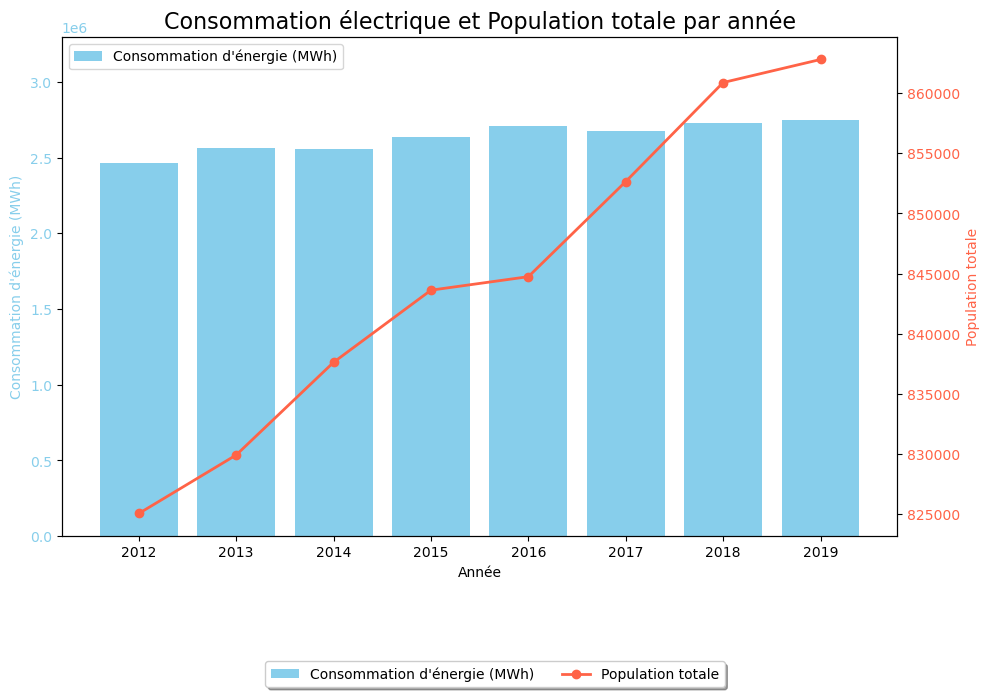

In [14]:
import matplotlib.pyplot as plt

# Données
annee = df_fusion["annee"]
consommation_mwh = df_fusion["consommation_mwh"]
population_totale = df_fusion["population_totale"]

# Créer une figure plus grande
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barres pour la consommation d'énergie
ax1.bar(annee, consommation_mwh, color='skyblue', label='Consommation d\'énergie (MWh)')
ax1.set_xlabel('Année')
ax1.set_ylabel('Consommation d\'énergie (MWh)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Ajuster les limites de l'axe y pour la consommation d'énergie (utiliser un range plus grand)
ax1.set_ylim(0, max(consommation_mwh) * 1.2)

# Créer un deuxième axe partageant le même axe x
ax2 = ax1.twinx()

# Courbe pour la population
ax2.plot(annee, population_totale, color='tomato', marker='o', label='Population totale', linewidth=2)
ax2.set_ylabel('Population totale', color='tomato')
ax2.tick_params(axis='y', labelcolor='tomato')

# Ajouter une légende pour la consommation d'énergie
ax1.legend(loc='upper left')

# Masquer la légende en haut
ax2.legend().set_visible(False)

# Ajouter un titre
plt.title('Consommation électrique et Population totale par année', fontsize=16)

# Placer la légende en dehors du graphique
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)

# Ajuster la disposition pour éviter que la légende ne chevauche le graphique
plt.tight_layout()

# Afficher le graphique
plt.show()
